In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:

# Data loading
trader_data = pd.read_csv(r"C:\Users\ICON\Downloads\historical_data.csv")
fear_greed = pd.read_csv(r"C:\Users\ICON\Downloads\fear_greed_index.csv")


In [8]:
# Data preprocessing
# Convert both to same date format with correct format specification
trader_data['date'] = pd.to_datetime(trader_data['Timestamp IST'], format='%d-%m-%Y %H:%M').dt.date
fear_greed['date'] = pd.to_datetime(fear_greed['date']).dt.date

merged_data = trader_data.merge(fear_greed, on='date', how='left')


In [9]:
merged_data['value'].isnull().sum()

6

In [10]:
missing_dates = merged_data[merged_data['value'].isnull()]['date'].unique()
print("Dates with missing Fear Greed data:")
print(missing_dates)

Dates with missing Fear Greed data:
[datetime.date(2024, 10, 26)]


In [11]:
print(merged_data.describe())

       Execution Price   Size Tokens      Size USD  Start Position  \
count    211224.000000  2.112240e+05  2.112240e+05    2.112240e+05   
mean      11414.723350  4.623365e+03  5.639451e+03   -2.994625e+04   
std       29447.654868  1.042729e+05  3.657514e+04    6.738074e+05   
min           0.000005  8.740000e-07  0.000000e+00   -1.433463e+07   
25%           4.854700  2.940000e+00  1.937900e+02   -3.762311e+02   
50%          18.280000  3.200000e+01  5.970450e+02    8.472793e+01   
75%         101.580000  1.879025e+02  2.058960e+03    9.337278e+03   
max      109004.000000  1.582244e+07  3.921431e+06    3.050948e+07   

          Closed PnL      Order ID            Fee      Trade ID     Timestamp  \
count  211224.000000  2.112240e+05  211224.000000  2.112240e+05  2.112240e+05   
mean       48.749001  6.965388e+10       1.163967  5.628549e+14  1.737744e+12   
std       919.164828  1.835753e+10       6.758854  3.257565e+14  8.689920e+09   
min   -117990.104100  1.732711e+08      -1.17

In [12]:
print(merged_data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
 16  date              21

In [13]:
clean_data = merged_data[merged_data['date'] != pd.Timestamp('2024-10-26').date()]
print(f"Removed {len(merged_data) - len(clean_data)} rows")

Removed 6 rows


In [14]:
print(clean_data[['value', 'Closed PnL']].describe())

               value     Closed PnL
count  211218.000000  211218.000000
mean       51.649656      48.549304
std        21.012784     917.989791
min        10.000000 -117990.104100
25%        33.000000       0.000000
50%        49.000000       0.000000
75%        72.000000       5.790132
max        94.000000  135329.090100


In [15]:
print(clean_data[['value', 'Closed PnL']].corr())

               value  Closed PnL
value       1.000000    0.008121
Closed PnL  0.008121    1.000000


In [17]:
# Analysis 
print("=== BASIC ANALYSIS ===")
print(f"Total trades: {len(clean_data)}")
print("\nMarket Sentiment Distribution:")
print(clean_data['classification'].value_counts())


=== BASIC ANALYSIS ===
Total trades: 211218

Market Sentiment Distribution:
classification
Fear             61837
Greed            50303
Extreme Greed    39992
Neutral          37686
Extreme Fear     21400
Name: count, dtype: int64


In [18]:
# Profit analysis
print("\n=== PROFIT ANALYSIS ===")
profit_stats = clean_data.groupby('classification')['Closed PnL'].agg(['mean', 'std', 'count'])
print(profit_stats.round())


=== PROFIT ANALYSIS ===
                mean     std  count
classification                     
Extreme Fear    35.0  1136.0  21400
Extreme Greed   68.0   767.0  39992
Fear            54.0   935.0  61837
Greed           43.0  1116.0  50303
Neutral         34.0   517.0  37686


In [19]:
# Win rate analysis  
print("\n=== WIN RATE ANALYSIS ===")
clean_data['is_profit'] = clean_data['Closed PnL'] > 0
win_rates = clean_data.groupby('classification')['is_profit'].mean() * 100
print(win_rates.round(1))



=== WIN RATE ANALYSIS ===
classification
Extreme Fear     37.1
Extreme Greed    46.5
Fear             42.1
Greed            38.5
Neutral          39.7
Name: is_profit, dtype: float64


C:\Users\ICON\AppData\Local\Temp\ipykernel_3764\3054717571.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['is_profit'] = clean_data['Closed PnL'] > 0


In [20]:
# Risk-return analysis
print("\n=== RISK-RETURN ANALYSIS ===")
profit_stats['risk_return_ratio'] = profit_stats['mean'] / profit_stats['std']
print(profit_stats[['risk_return_ratio']].round(2))


=== RISK-RETURN ANALYSIS ===
                risk_return_ratio
classification                   
Extreme Fear                 0.03
Extreme Greed                0.09
Fear                         0.06
Greed                        0.04
Neutral                      0.07


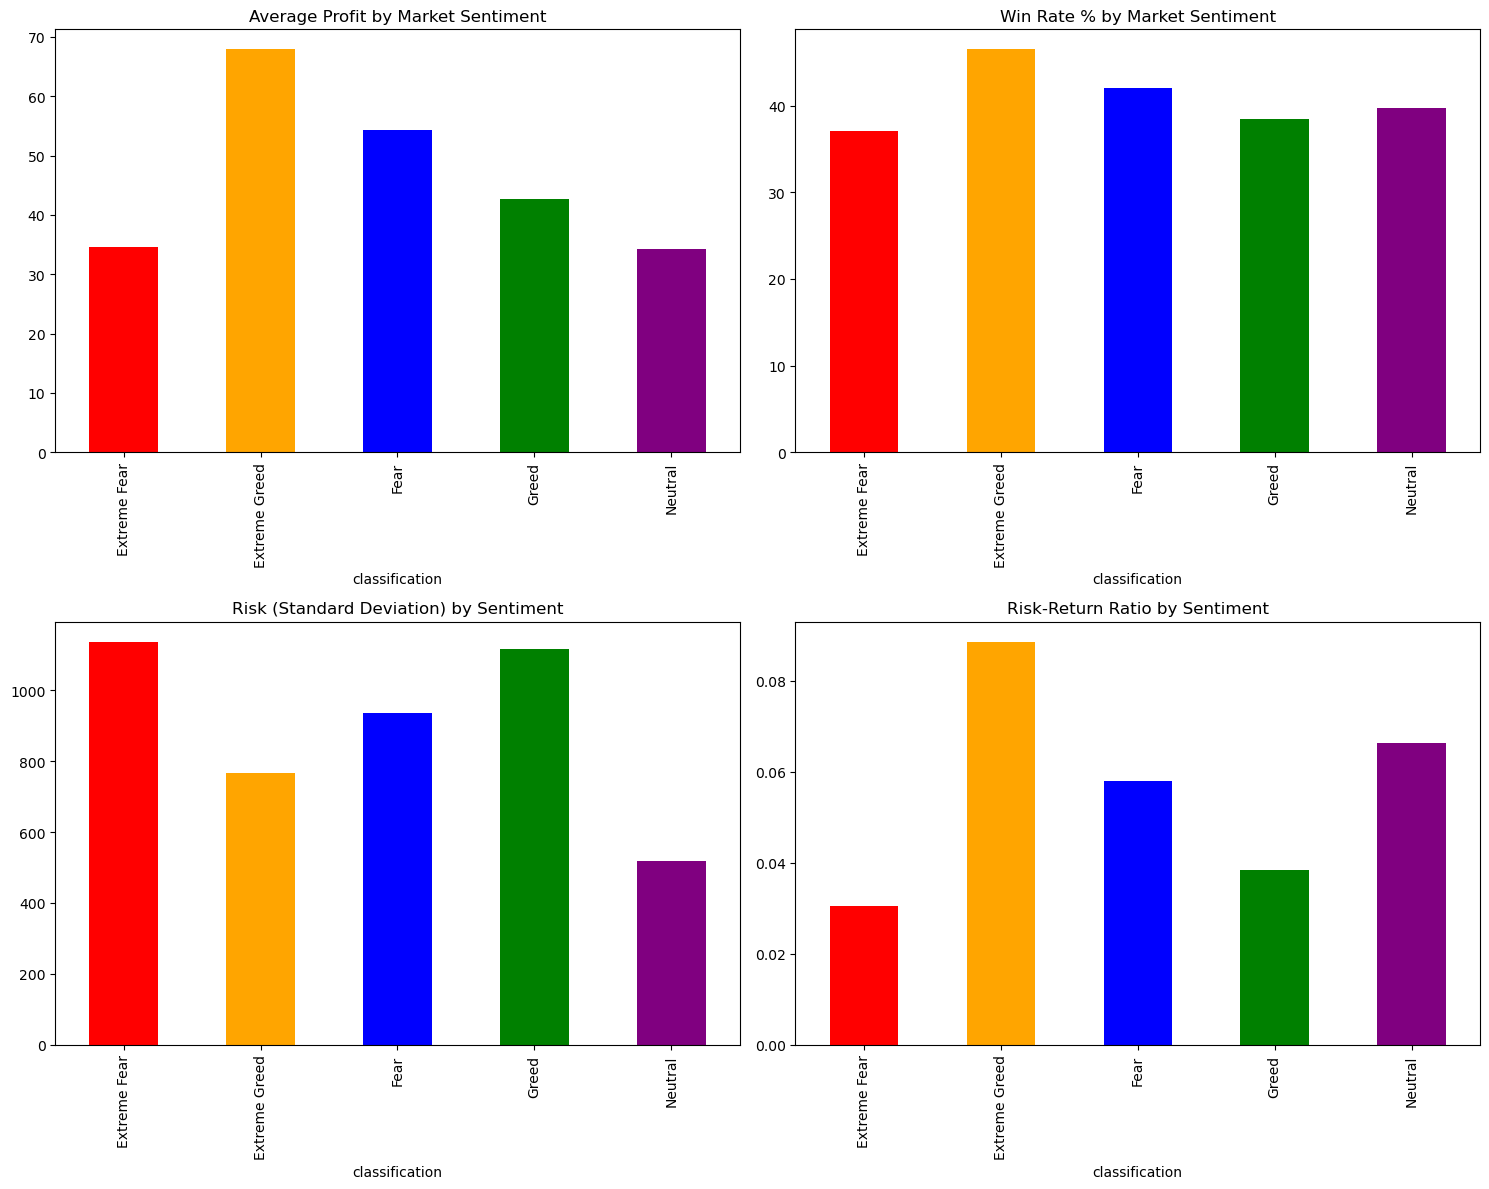

In [21]:
# Visualization
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

profit_stats['mean'].plot(kind='bar', ax=ax1, color=['red', 'orange', 'blue', 'green', 'purple'])
ax1.set_title('Average Profit by Market Sentiment')

win_rates.plot(kind='bar', ax=ax2, color=['red', 'orange', 'blue', 'green', 'purple'])
ax2.set_title('Win Rate % by Market Sentiment')

profit_stats['std'].plot(kind='bar', ax=ax3, color=['red', 'orange', 'blue', 'green', 'purple'])
ax3.set_title('Risk (Standard Deviation) by Sentiment')

profit_stats['risk_return_ratio'].plot(kind='bar', ax=ax4, color=['red', 'orange', 'blue', 'green', 'purple'])
ax4.set_title('Risk-Return Ratio by Sentiment')

plt.tight_layout()
plt.show()